In [2]:

import pandas as pd

messages = pd.read_csv('dataset/SMSSpamCollection.csv', sep='\t',
                           names=["label", "message"])

#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values



In [6]:


# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
ss=confusion_matrix(y_test,y_pred)

In [11]:
ss

array([[945,  10],
       [  8, 152]], dtype=int64)

In [13]:
import seaborn as sb


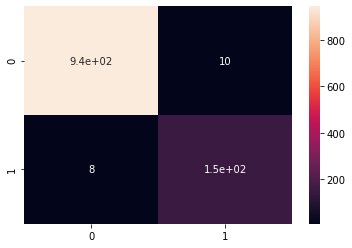

In [15]:
map=sb.heatmap(ss,annot=True)